In [2]:
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

In [3]:
theta = 0 # all pixels black
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw()

┌───┐ ░                                       ░                    »
   q_0: ┤ H ├─░─────■──────■─────────────■────────────░──────────■──────■──»
        ├───┤ ░     │    ┌─┴─┐         ┌─┴─┐          ░ ┌───┐    │    ┌─┴─┐»
   q_1: ┤ H ├─░─────┼────┤ X ├────■────┤ X ├────■─────░─┤ X ├────┼────┤ X ├»
        └───┘ ░ ┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐ ░ └───┘┌───┴───┐└───┘»
   q_2: ──────░─┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├─░──────┤ Ry(0) ├─────»
              ░ └───────┘     └───────┘     └───────┘ ░      └───────┘     »
meas_0: ═══════════════════════════════════════════════════════════════════»
                                                                           »
meas_1: ═══════════════════════════════════════════════════════════════════»
                                                                           »
meas_2: ═══════════════════════════════════════════════════════════════════»
                                                                           »
«                                ░ ┌───┐                                     »
«   q_0: ───────────■────────────░─┤ X ├────■──────■─────────────■───────────»
«                 ┌─┴─┐          ░ ├───┤    │    ┌─┴─┐         ┌─┴─┐         »
«   q_1: ────■────┤ X ├────■─────░─┤ X ├────┼────┤ X ├────■────┤ X ├────■────»
«        ┌───┴───┐└───┘┌───┴───┐ ░ └───┘┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐»
«   q_2: ┤ Ry(0) ├─────┤ Ry(0) ├─░──────┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├»
«        └───────┘     └───────┘ ░      └───────┘     └───────┘     └───────┘»
«meas_0: ════════════════════════════════════════════════════════════════════»
«                                                                            »
«meas_1: ════════════════════════════════════════════════════════════════════»
«                                                                            »
«meas_2: ════════════════════════════════════════════════════════════════════»
«                                                                            »
«         ░                                            ░ ┌─┐      
«   q_0: ─░──────────■──────■─────────────■────────────░─┤M├──────
«         ░ ┌───┐    │    ┌─┴─┐         ┌─┴─┐          ░ └╥┘┌─┐   
«   q_1: ─░─┤ X ├────┼────┤ X ├────■────┤ X ├────■─────░──╫─┤M├───
«         ░ └───┘┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐ ░  ║ └╥┘┌─┐
«   q_2: ─░──────┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├─░──╫──╫─┤M├
«         ░      └───────┘     └───────┘     └───────┘ ░  ║  ║ └╥┘
«meas_0: ═════════════════════════════════════════════════╩══╬══╬═
«                                                            ║  ║ 
«meas_1: ════════════════════════════════════════════════════╩══╬═
«                                                               ║ 
«meas_2: ═══════════════════════════════════════════════════════╩═
«

### Measurement and Image Retrieval

{'011': 965, '000': 1091, '010': 1037, '001': 1003}


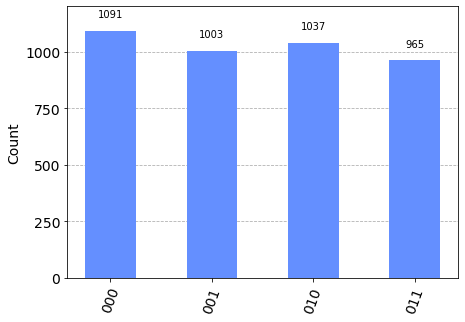

In [4]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

### Circuit Analysis

In [6]:
print("Depth: ", qc.depth())
print("Operations: ", qc.count_ops())

Depth:  23
Operations:  OrderedDict([('cry', 12), ('cx', 8), ('barrier', 5), ('x', 4), ('measure', 3), ('h', 2)])


In [8]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(qc)
new_circ.draw()

┌─────────────┐ ░                                                  »
   q_0: ┤ U3(π/2,0,π) ├─░────────────────■─────────────────■────────■──────»
        ├─────────────┤ ░                │                 │      ┌─┴─┐    »
   q_1: ┤ U3(π/2,0,π) ├─░────────────────┼─────────────────┼──────┤ X ├────»
        └─────────────┘ ░ ┌───────────┐┌─┴─┐┌───────────┐┌─┴─┐┌───┴───┴───┐»
   q_2: ────────────────░─┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├»
                        ░ └───────────┘└───┘└───────────┘└───┘└───────────┘»
meas_0: ═══════════════════════════════════════════════════════════════════»
                                                                           »
meas_1: ═══════════════════════════════════════════════════════════════════»
                                                                           »
meas_2: ═══════════════════════════════════════════════════════════════════»
                                                                           »
«                                                                    ░ »
«   q_0: ─────────────────────────────■──────────────────────────────░─»
«                                   ┌─┴─┐                            ░ »
«   q_1: ──■─────────────────■──────┤ X ├──────■─────────────────■───░─»
«        ┌─┴─┐┌───────────┐┌─┴─┐┌───┴───┴───┐┌─┴─┐┌───────────┐┌─┴─┐ ░ »
«   q_2: ┤ X ├┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├┤ X ├─░─»
«        └───┘└───────────┘└───┘└───────────┘└───┘└───────────┘└───┘ ░ »
«meas_0: ══════════════════════════════════════════════════════════════»
«                                                                      »
«meas_1: ══════════════════════════════════════════════════════════════»
«                                                                      »
«meas_2: ══════════════════════════════════════════════════════════════»
«                                                                      »
«                                                                           »
«   q_0: ───────────────■─────────────────■────────■────────────────────────»
«        ┌───────────┐  │                 │      ┌─┴─┐                      »
«   q_1: ┤ U3(π,0,π) ├──┼─────────────────┼──────┤ X ├──────■───────────────»
«        ├───────────┤┌─┴─┐┌───────────┐┌─┴─┐┌───┴───┴───┐┌─┴─┐┌───────────┐»
«   q_2: ┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├»
«        └───────────┘└───┘└───────────┘└───┘└───────────┘└───┘└───────────┘»
«meas_0: ═══════════════════════════════════════════════════════════════════»
«                                                                           »
«meas_1: ═══════════════════════════════════════════════════════════════════»
«                                                                           »
«meas_2: ═══════════════════════════════════════════════════════════════════»
«                                                                           »
«                                                  ░ ┌───────────┐     »
«   q_0: ───────────■──────────────────────────────░─┤ U3(π,0,π) ├──■──»
«                 ┌─┴─┐                            ░ ├───────────┤  │  »
«   q_1: ──■──────┤ X ├──────■─────────────────■───░─┤ U3(π,0,π) ├──┼──»
«        ┌─┴─┐┌───┴───┴───┐┌─┴─┐┌───────────┐┌─┴─┐ ░ ├───────────┤┌─┴─┐»
«   q_2: ┤ X ├┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├┤ X ├─░─┤ U3(0,0,0) ├┤ X ├»
«        └───┘└───────────┘└───┘└───────────┘└───┘ ░ └───────────┘└───┘»
«meas_0: ══════════════════════════════════════════════════════════════»
«                                                                      »
«meas_1: ══════════════════════════════════════════════════════════════»
«                                                                      »
«meas_2: ══════════════════════════════════════════════════════════════»
«                                                                      »
«                                                                           »
«   q_0: ────────

In [9]:
print("Depth : ", new_circ.depth())
print("Operations: ", new_circ.count_ops())

Depth :  50
Operations:  OrderedDict([('cx', 32), ('u3', 30), ('barrier', 5), ('measure', 3)])


In [11]:
from qiskit.providers.fake_provider import FakeAthens
fake_athens = FakeAthens()
# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = fake_athens.configuration().coupling_map
optimized_3 = transpile(qc, backend=fake_athens, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

gates =  OrderedDict([('rz', 13), ('sx', 7), ('barrier', 5), ('x', 4), ('cx', 3), ('measure', 3)])
depth =  19


{'010': 1002, '001': 1066, '000': 1008, '011': 1020}


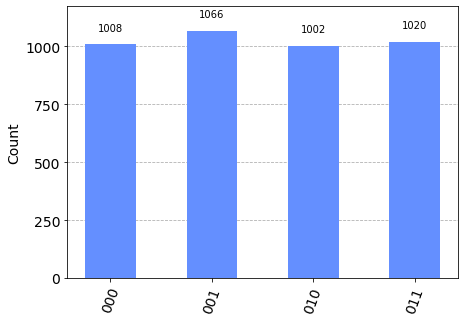

In [14]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(t_qc1, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

## NEQR

In [16]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

# Initialize the quantum circuit for the image 
# Pixel position
idx = QuantumRegister(2, 'idx')
# grayscale pixel intensity value
intensity = QuantumRegister(8,'intensity')
# classical register
cr = ClassicalRegister(10, 'cr')

# create the quantum circuit for the image
qc_image = QuantumCircuit(intensity, idx, cr)

# set the total number of qubits
num_qubits = qc_image.num_qubits

qc_image.draw()

intensity_0: 
             
intensity_1: 
             
intensity_2: 
             
intensity_3: 
             
intensity_4: 
             
intensity_5: 
             
intensity_6: 
             
intensity_7: 
             
      idx_0: 
             
      idx_1: 
             
       cr_0: 
             
       cr_1: 
             
       cr_2: 
             
       cr_3: 
             
       cr_4: 
             
       cr_5: 
             
       cr_6: 
             
       cr_7: 
             
       cr_8: 
             
       cr_9:

In [17]:
# Initialize the quantum circuit

# Optional: Add Identity gates to the intensity values
for idx in range(intensity.size):
    qc_image.i(idx)

# Add Hadamard gates to the pixel positions    
qc_image.h(8)
qc_image.h(9)

# Separate with barrier so it is easy to read later.
qc_image.barrier()
qc_image.draw()

┌───┐ ░ 
intensity_0: ┤ I ├─░─
             ├───┤ ░ 
intensity_1: ┤ I ├─░─
             ├───┤ ░ 
intensity_2: ┤ I ├─░─
             ├───┤ ░ 
intensity_3: ┤ I ├─░─
             ├───┤ ░ 
intensity_4: ┤ I ├─░─
             ├───┤ ░ 
intensity_5: ┤ I ├─░─
             ├───┤ ░ 
intensity_6: ┤ I ├─░─
             ├───┤ ░ 
intensity_7: ┤ I ├─░─
             ├───┤ ░ 
      idx_0: ┤ H ├─░─
             ├───┤ ░ 
      idx_1: ┤ H ├─░─
             └───┘ ░ 
       cr_0: ════════
                     
       cr_1: ════════
                     
       cr_2: ════════
                     
       cr_3: ════════
                     
       cr_4: ════════
                     
       cr_5: ════════
                     
       cr_6: ════════
                     
       cr_7: ════════
                     
       cr_8: ════════
                     
       cr_9: ════════

In [18]:
# Encode the first pixel, since its value is 0, we will apply ID gates here:
for idx in range(num_qubits):
    qc_image.i(idx)

qc_image.barrier()
qc_image.draw()

┌───┐ ░ ┌───┐ ░ 
intensity_0: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_1: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_2: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_3: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_4: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_5: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_6: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_7: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
      idx_0: ┤ H ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
      idx_1: ┤ H ├─░─┤ I ├─░─
             └───┘ ░ └───┘ ░ 
       cr_0: ════════════════
                             
       cr_1: ════════════════
                             
       cr_2: ════════════════
                             
       cr_3: ════════════════
                             
       cr_4: ════════════════
                             
       cr_5: ════════════════
                             
       cr_6: ════════════════
                             
       cr_7: ════════════════
                             
       cr_8: ════════════════
                             
       cr_9: ════════════════

In [19]:
# Encode the second pixel whose value is (01100100):
value01 = '01100100'

# Add the NOT gate to set the position at 01:
qc_image.x(qc_image.num_qubits-1)

# We'll reverse order the value so it is in the same order when measured.
for idx, px_value in enumerate(value01[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)

# Reset the NOT gate
qc_image.x(num_qubits-1)

qc_image.barrier()
qc_image.draw()

┌───┐ ░ ┌───┐ ░                           ░ 
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░─
             ├───┤ ░ ├───┤ ░                           ░ 
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░─
             ├───┤ ░ ├───┤ ░      ┌───┐                ░ 
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░─
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░ 
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░─
             ├───┤ ░ ├───┤ ░        │                  ░ 
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░─
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░ 
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░─
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░ 
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░─
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░ 
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░─
             ├───┤ ░ ├───┤ ░        │    │    │        ░ 
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░─
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ 
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░─
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░ 
       cr_0: ════════════════════════════════════════════
                                                         
       cr_1: ════════════════════════════════════════════
                                                         
       cr_2: ════════════════════════════════════════════
                                                         
       cr_3: ════════════════════════════════════════════
                                                         
       cr_4: ════════════════════════════════════════════
                                                         
       cr_5: ════════════════════════════════════════════
                                                         
       cr_6: ════════════════════════════════════════════
                                                         
       cr_7: ════════════════════════════════════════════
                                                         
       cr_8: ════════════════════════════════════════════
                                                         
       cr_9: ════════════════════════════════════════════

In [20]:
# Encode the third pixel whose value is (11001000):
value10 = '11001000'

# Add the 0CNOT gates, where 0 is on X pixel:
qc_image.x(num_qubits-2)
for idx, px_value in enumerate(value10[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)
qc_image.x(num_qubits-2)


qc_image.barrier()
qc_image.draw()

┌───┐ ░ ┌───┐ ░                           ░                     »
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░                           ░                     »
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      ┌───┐                ░                     »
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░      ┌───┐          »
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░──────┤ X ├──────────»
             ├───┤ ░ ├───┤ ░        │                  ░      └─┬─┘          »
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░        │            »
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░        │  ┌───┐     »
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░────────┼──┤ X ├─────»
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░        │  └─┬─┘┌───┐»
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░────────┼────┼──┤ X ├»
             ├───┤ ░ ├───┤ ░        │    │    │        ░ ┌───┐  │    │  └─┬─┘»
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░─┤ X ├──■────■────■──»
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ └───┘  │    │    │  »
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░────────■────■────■──»
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░                     »
       cr_0: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_1: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_2: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_3: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_4: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_5: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_6: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_7: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_8: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_9: ════════════════════════════════════════════════════════════════»
                                                                             »
«                   ░ 
«intensity_0: ──────░─
«                   ░ 
«intensity_1: ──────░─
«                   ░ 
«intensity_2: ──────░─
«                   ░ 
«intensity_3: ──────░─
«                   ░ 
«intensity_4: ──────░─
«                   ░ 
«intensity_5: ──────░─
«                   ░ 
«intensity_6: ──────░─
«                   ░ 
«intensity_7: ──────░─
«             ┌───┐ ░ 
«      idx_0: ┤ X ├─░─
«             └───┘ ░ 
«      idx_1: ──────░─
«                   ░ 
«       cr_0: ════════
«                     
«       cr_1: ════════
«                     
«       cr_2: ════════
«                     
«       cr_3: ════════
«                     
«       cr_4: ════════
«                     
«       cr_5: ════════
«                     
«       cr_6: ═

In [21]:
# Encode the third pixel whose value is (11111111):
value11 = '11111111'

# Add the CCNOT gates:
for idx, px_value in enumerate(value11):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1,num_qubits-2, idx)

qc_image.barrier()
qc_image.measure(range(10),range(10))
qc_image.draw()

┌───┐ ░ ┌───┐ ░                           ░                     »
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░                           ░                     »
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      ┌───┐                ░                     »
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░      ┌───┐          »
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░──────┤ X ├──────────»
             ├───┤ ░ ├───┤ ░        │                  ░      └─┬─┘          »
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░        │            »
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░        │  ┌───┐     »
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░────────┼──┤ X ├─────»
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░        │  └─┬─┘┌───┐»
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░────────┼────┼──┤ X ├»
             ├───┤ ░ ├───┤ ░        │    │    │        ░ ┌───┐  │    │  └─┬─┘»
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░─┤ X ├──■────■────■──»
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ └───┘  │    │    │  »
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░────────■────■────■──»
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░                     »
       cr_0: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_1: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_2: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_3: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_4: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_5: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_6: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_7: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_8: ════════════════════════════════════════════════════════════════»
                                                                             »
       cr_9: ════════════════════════════════════════════════════════════════»
                                                                             »
«                   ░ ┌───┐                                    ░ ┌─┐         »
«intensity_0: ──────░─┤ X ├────────────────────────────────────░─┤M├─────────»
«                   ░ └─┬─┘┌───┐                               ░ └╥┘┌─┐      »
«intensity_1: ──────░───┼──┤ X ├───────────────────────────────░──╫─┤M├──────»
«                   ░   │  └─┬─┘┌───┐                          ░  ║ └╥┘┌─┐   »
«intensity_2: ──────░───┼────┼──┤ X ├──────────────────────────░──╫──╫─┤M├───»
«                   ░   │    │  └─┬─┘┌───┐                     ░  ║  ║ └╥┘┌─┐»
«intensity_3: ──────░───┼────┼────┼──┤ X ├─────────────────────░──╫──╫──╫─┤M├»
«                   ░   │    │    │  └─┬─┘┌───┐                ░  ║  ║  ║ └╥┘»
«intensity_4: ──────░───┼────┼────┼────┼──┤ X ├────────────────

In [22]:
print('Circuit dimensions')
print('Circuit depth: ', qc_image.decompose().depth())
print('Circuit size: ', qc_image.decompose().size())

qc_image.decompose().count_ops()

Circuit dimensions
Circuit depth:  148
Circuit size:  244


OrderedDict([('cx', 84),
             ('t', 56),
             ('tdg', 42),
             ('h', 28),
             ('id', 18),
             ('measure', 10),
             ('barrier', 5),
             ('u3', 4),
             ('u2', 2)])

Encoded: 00 = 0
Encoded: 01 = 01100100
Encoded: 10 = 11001000
Encoded: 11 = 1
{'0000000000': 2022, '1111111111': 1996, '0101100100': 2099, '1011001000': 2075}


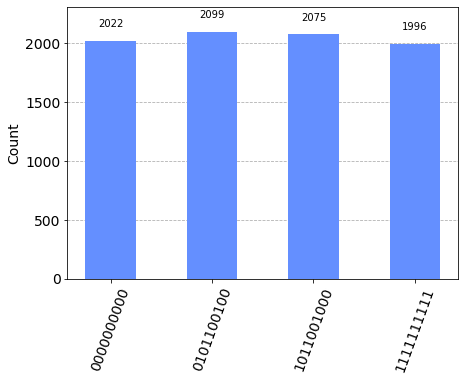

In [23]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
print('Encoded: 00 = 0')
print('Encoded: 01 = 01100100')
print('Encoded: 10 = 11001000')
print('Encoded: 11 = 1')

print(counts_neqr)
plot_histogram(counts_neqr)